In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [14]:
def angle(t):

  return 2 * np.pi * t

def card(a, phi):

  return 2*a*(1 - np.cos(phi))*np.cos(phi), 2*a*(1 - np.cos(phi))*np.sin(phi)

def cycle(a, T, n):

  t1 = np.linspace(0, 1, 1250)
  t2 = np.linspace(0, 1, 1000)
  t3 = np.linspace(0, 1, 1250)

  x1 = np.zeros(2000)
  x2 = -a/4 * np.cos(2 * np.pi * t1) + a/4
  x3 = np.zeros(250)
  x4, _ = card(a, angle(t2))
  x5 = -a/2 * np.cos(2 * np.pi * t3) + a/2

  X1 = np.append(x1, x2)
  X1 = np.append(X1, x3)
  X1 = np.append(X1, -x4)
  X1 = np.append(X1, x3)
  X1 = np.append(X1, x5)

  t = np.linspace(0, T*n, 6000*n)

  X = X1.copy()

  for i in range(n-1): X = np.append(X, X1)

  return t, X


In [15]:
t, x = cycle(1, 1, 3)

In [16]:
t.shape

(18000,)

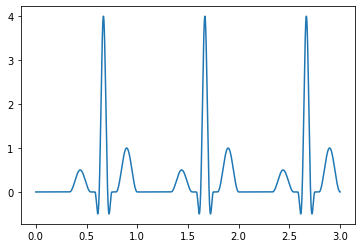

In [17]:
plt.plot(t, x)

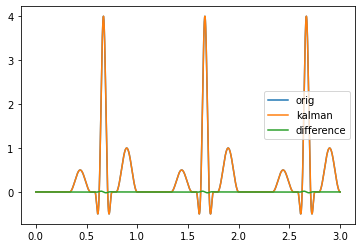

In [18]:
def filter(s, t, alpha = 0.55, beta = 0.0003):

  x10 = s[0]
  filt = [x10]
  der10 = 0

  for i in range(1, len(t)):

    x11 = x10 + alpha*(s[i]- x10)
    der11 = der10 + beta*(s[i] - der10) / (t[i] - t[i-1])

    x10 = x11 + (t[i] - t[i-1])*der11
    der10 = der11

    filt.append(x11)

  return filt

filted = filter(x, t)

plt.plot(t, x, label="orig")
plt.plot(t, filted, label="kalman")
plt.plot(t, x - filted, label="difference")
plt.legend()

In [19]:
n = np.random.uniform(-1, 1, t.shape)

xn = x + n

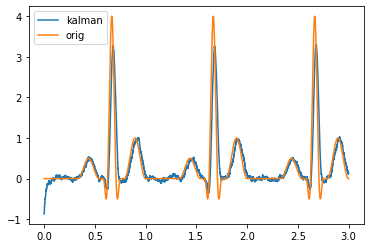

In [20]:
filted = filter(xn, t, 0.009, 0.00005)

#plt.plot(t, xn)
plt.plot(t, filted, label="kalman")
plt.plot(t, x, label="orig")
plt.legend()

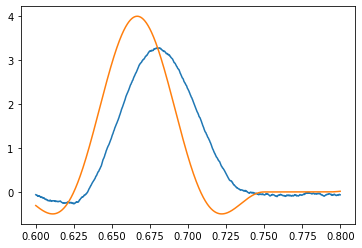

In [21]:
n1, n2 = 3600, 4800
plt.plot(t[n1:n2], filted[n1:n2])
plt.plot(t[n1:n2], x[n1:n2])

array([0.01466748])

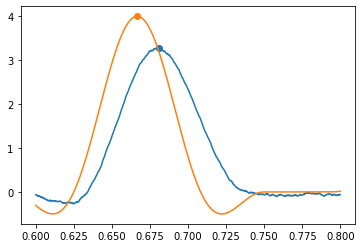

In [22]:
p_t, _ = find_peaks(x[n1:n2], 2)
p_f, _ = find_peaks(filted[n1:n2], 2, distance = 300)

filted = np.array(filted)
x = np.array(x)

plt.plot(t[n1:n2], filted[n1:n2])
plt.scatter(t[n1 + p_f], filted[n1 + p_f])
plt.plot(t[n1:n2], x[n1:n2])
plt.scatter(t[n1 + p_t], x[n1 + p_t])

(p_f - p_t) * (t[1] - t[0])